In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset



In [2]:
df = pd.read_csv('GLHYD_data_metric.csv')

# Now df is a DataFrame object, you can view its content with print(df)
print(df)

     month  year  Superior  Michigan-Huron  St. Clair    Erie  Ontario
0      jan  1918    183.25          176.71     174.59  173.90    74.74
1      feb  1918    183.20          176.73     174.74  173.82    74.72
2      mar  1918    183.17          176.80     174.74  174.01    74.92
3      apr  1918    183.14          176.89     174.84  174.02    75.10
4      may  1918    183.22          176.99     175.00  173.98    75.09
...    ...   ...       ...             ...        ...     ...      ...
1255   aug  2022    183.65          176.79     175.50  174.55    74.74
1256   sep  2022    183.65          176.71     175.41  174.46    74.55
1257   oct  2022    183.60          176.60     175.25  174.32    74.41
1258   nov  2022    183.60          176.55     175.14  174.25    74.40
1259   dec  2022    183.57          176.46     175.12  174.20    74.47

[1260 rows x 7 columns]


In [3]:
print(df['Ontario'])


0       74.74
1       74.72
2       74.92
3       75.10
4       75.09
        ...  
1255    74.74
1256    74.55
1257    74.41
1258    74.40
1259    74.47
Name: Ontario, Length: 1260, dtype: float64


In [4]:
data_reshaped = df['Ontario'].values.reshape(-1, 12)
data_reshaped
# Define the months
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Initialize the dictionary with months
data_dict = {"Month": months}

# Populate the dictionary with data for each year
for year in range(data_reshaped.shape[0]):
    data_dict[f"Year{year+1}"] = data_reshaped[year].tolist()


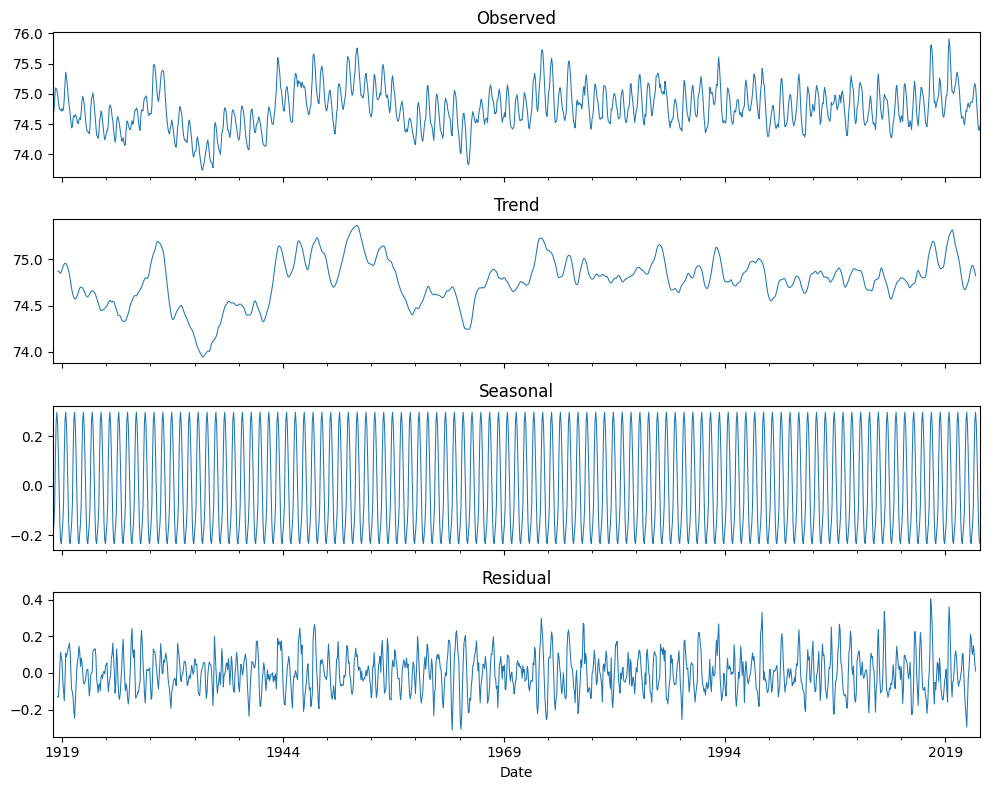

In [22]:
df = pd.DataFrame(data_dict)
df_melt = df.melt(id_vars=["Month"], var_name="Year", value_name="Level")
df_melt['Date'] = df_melt['Year'].str.extract('(\d+)').astype(int) + 1917
df_melt['Date'] = df_melt['Date'].astype(str) + '-' + df_melt['Month'] 

df_melt['Date'] = pd.to_datetime(df_melt['Date'], format='%Y-%b')
df_melt.set_index('Date', inplace=True)
df_melt.drop(columns=['Month', 'Year'], inplace=True)
df_melt.sort_index(inplace=True)
result = seasonal_decompose(df_melt['Level'], model='additive', period=12)
# result.plot()
# plt.show()
# print(df_melt)
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,8))

result.observed.plot(ax=axes[0], linewidth=0.75, title='Observed')
result.trend.plot(ax=axes[1], linewidth=0.75, title='Trend')
result.seasonal.plot(ax=axes[2], linewidth=0.75, title='Seasonal')
result.resid.plot(ax=axes[3], linewidth=0.75, title='Residual')

# Adjust the layout
plt.tight_layout()
plt.show()


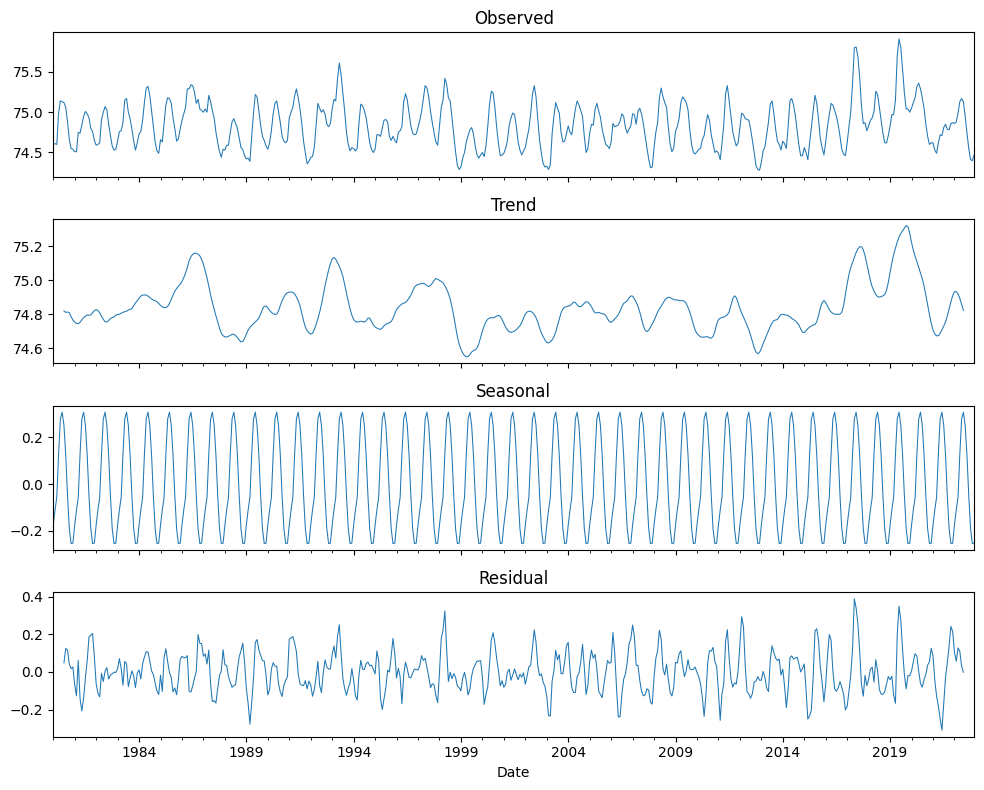

In [25]:

# Filter the DataFrame to only include dates from 1980 onwards
df_melt = df_melt[df_melt.index.year >= 1980]
# Now you can continue with your analysis using df_melt_1980_onwards
result = seasonal_decompose(df_melt_1980_onwards['Level'], model='additive', period=12)
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,8))

result.observed.plot(ax=axes[0], linewidth=0.75, title='Observed')
result.trend.plot(ax=axes[1], linewidth=0.75, title='Trend')
result.seasonal.plot(ax=axes[2], linewidth=0.75, title='Seasonal')
result.resid.plot(ax=axes[3], linewidth=0.75, title='Residual')

# Adjust the layout
plt.tight_layout()
plt.show()


/Users/linrongcai/research/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/linrongcai/research/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


[Timestamp('2023-01-01 00:00:00'), Timestamp('2023-02-01 00:00:00'), Timestamp('2023-03-01 00:00:00'), Timestamp('2023-04-01 00:00:00'), Timestamp('2023-05-01 00:00:00'), Timestamp('2023-06-01 00:00:00'), Timestamp('2023-07-01 00:00:00'), Timestamp('2023-08-01 00:00:00'), Timestamp('2023-09-01 00:00:00'), Timestamp('2023-10-01 00:00:00'), Timestamp('2023-11-01 00:00:00'), Timestamp('2023-12-01 00:00:00'), Timestamp('2024-01-01 00:00:00'), Timestamp('2024-02-01 00:00:00'), Timestamp('2024-03-01 00:00:00'), Timestamp('2024-04-01 00:00:00'), Timestamp('2024-05-01 00:00:00'), Timestamp('2024-06-01 00:00:00'), Timestamp('2024-07-01 00:00:00'), Timestamp('2024-08-01 00:00:00'), Timestamp('2024-09-01 00:00:00'), Timestamp('2024-10-01 00:00:00')]


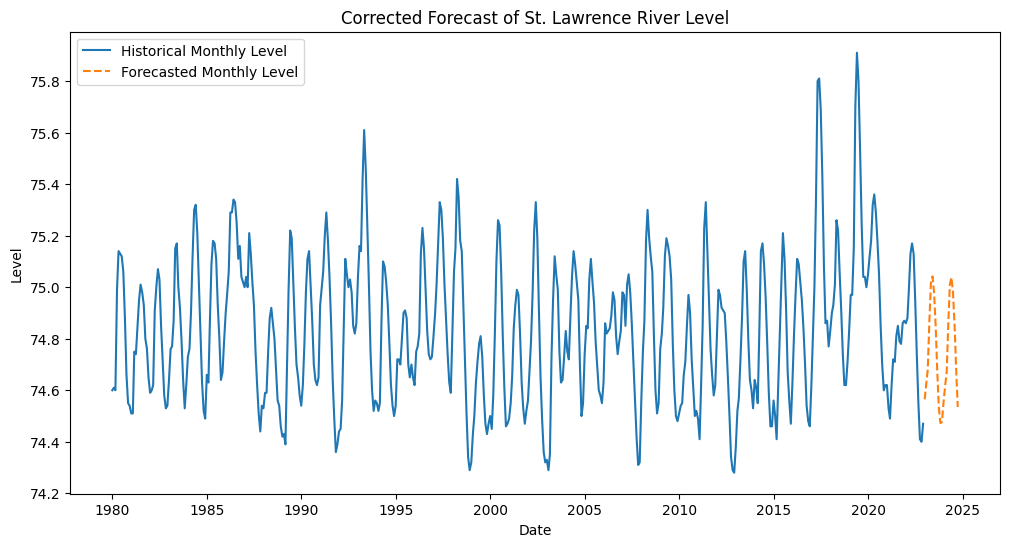

,predicted_mean
2023-01-01,74.564718
2023-02-01,74.626768
2023-03-01,74.680306
2023-04-01,74.866691
2023-05-01,75.015676
2023-06-01,75.041861
2023-07-01,74.980270
2023-08-01,74.848118
2023-09-01,74.673400
2023-10-01,74.533078


In [27]:
p, d, q = 1, 1, 1 
P, D, Q, S = 1, 1, 1, 12  

model_corrected = SARIMAX(df_melt['Level'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit_corrected = model_corrected.fit(disp=False)

future_dates_corrected = [df_melt.index[-1] + DateOffset(months=x) for x in range(1, 23)]
print(future_dates_corrected)
forecast_corrected = model_fit_corrected.predict(start=future_dates_corrected[0], end=future_dates_corrected[-1])

forecast_df_corrected = pd.DataFrame(forecast_corrected, columns=['predicted_mean'])

plt.figure(figsize=(12, 6))
plt.plot(df_melt.index, df_melt['Level'], label='Historical Monthly Level')


plt.plot(forecast_df_corrected.index, forecast_df_corrected['predicted_mean'], label='Forecasted Monthly Level', linestyle='--')
plt.title('Corrected Forecast of St. Lawrence River Level')
plt.xlabel('Date')
plt.ylabel('Level')
plt.legend()
plt.show()

forecast_df_corrected
